# Tutorial: Uber Rides Dataset


## Introduction

This tutorial will walk you through the entire data science pipeline using [Uber Rides Data](https://www.kaggle.com/datasets/ruchikakumbhar/uber-dataset). From acquiring and curating raw data to transforming it into a structured, queryable format.

We will begin with data cleaning and preprocessing, addressing missing values, correcting data types, and handling outliers to ensure data quality. Next, we'll dive into exploratory data analysis (EDA) to uncover patterns and trends.

Hypothesis testing and machine learning techniques will then be applied to extract meaningful insights. Finally, the tutorial will cover how to effectively communicate results using visualizations and clear explanations.

## Part 1: Data Preprocessing

### Step 1: Importing tools

In this tutorial, we will use common data analysis tools such as numpy and pandas.

In [1]:
import numpy as np
import pandas as pd

### Step 2: Importing the data
To start, we need to import the dataset into a pandas dataframe

In [2]:
# Read data from the CSV file
uber_data = pd.read_csv("./UberDataset.csv") 

# Display the first five rows
display(uber_data.head())


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Step 3: Parsing Data Types
Once data is loaded, we need to ensure that all the columns have the correct data type.

In [3]:
# Check data types and notice that START_DATE and END_DATE are both objects and not datetime
print(uber_data.dtypes)

# Convert START_DATE and END_DATE to datetime variable
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

# Check data types again
print(uber_data.dtypes)


START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object
START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object


### Step 4: Droping Duplicates and Handling Missing Values
We now try to remove any duplicates and missing values. 

In [4]:
# Display DataFrame
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


From displaying the dataframe, notice that there are data labeled **Unknown Location** from the columns **START** and **Stop**. 

Note: About half of the values in the column **PURPOSE** are **NaN** values so we will **NOT** filter those out.

In [5]:
# Drop duplicate rows
uber_data.drop_duplicates(inplace=True)

# Drop rows where START_DATE or END_DATE is NaT
uber_data = uber_data[~pd.isna(uber_data["START_DATE"])]
uber_data = uber_data[~pd.isna(uber_data["END_DATE"])]

# Drop rows where START or STOP location is "Unknown Location"
uber_data = uber_data[uber_data["START"] != "Unknown Location"]
uber_data = uber_data[uber_data["STOP"] != "Unknown Location"]

# Drop rows that contains NaN in any column"
uber_data.dropna(subset=[col for col in uber_data.columns if col != 'PURPOSE'], inplace=True)


# Display updated dataframe
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


## Part 2: Data Exploration

### Method 1: Hypothesis Testing with Chi-square Test
We use a Chi-square test in order to see if there is an association between the CATEGORY and PURPOSE of the uber rides.

H0: There is no association between CATEGORY and PURPOSE for the uber rides.

HA: There is an assocaition between CATEGORY and PURPOSE for the uber rides.

In [6]:
from scipy.stats import chi2_contingency

# Before conducting the chi-squared test, filter the uber_data for only the CATEGORY and PURPOSE tabs
chi_data = pd.crosstab(uber_data['CATEGORY'], uber_data['PURPOSE'])
print(chi_data)

# Conduct the chi-squared test on the filtered data that contains just CATEGORY and PURPOSE
chi2 = chi2_contingency(chi_data)
print(chi2)

import seaborn as sns  
import matplotlib.pyplot as plt

# Create a heatmap to best see the relationship between CATEGORY and PURPOSE.
sns.heatmap(chi_data, annot=True, fmt='d', cmap='Blues')
# Name the graph
plt.title("CATEGORY vs. PURPOSE for uber rides")
plt.show()

PURPOSE   Airport/Travel  Between Offices  Charity ($)  Commute  \
CATEGORY                                                          
Business               1               18            0        0   
Personal               0                0            1        1   

PURPOSE   Customer Visit  Errand/Supplies  Meal/Entertain  Meeting  Moving  \
CATEGORY                                                                     
Business              92              111             148      163       0   
Personal               0                0               0        0       4   

PURPOSE   Temporary Site  
CATEGORY                  
Business              32  
Personal               0  
Chi2ContingencyResult(statistic=np.float64(571.0000000000001), pvalue=np.float64(3.4933378081111305e-117), dof=9, expected_freq=array([[9.89492119e-01, 1.78108581e+01, 9.89492119e-01, 9.89492119e-01,
        9.10332750e+01, 1.09833625e+02, 1.46444834e+02, 1.61287215e+02,
        3.95796848e+00, 3.16637478e+01

ModuleNotFoundError: No module named 'seaborn'

Based on the p-value above(less than .05), we reject the null hypothesis. Therefore, the conclusion is that there is an association between CATEGORY and PURPOSE.

In the context of our dataset, this means that people have an uber personal or business account based on the purposes of their rides. This helps us understand why people choose an uber personal or business account. If you're a business, it could be helpful to analyze this type of data to see how you should advertise your different memborship plans.

### Method 2: Hypothesis Testing with One-Sample $t$-Test

As we can see, trips starting with Cary has the highest number of trips:



In [ ]:
print(uber_data['START'].value_counts())


In this part, we use a One-Sample $t$-Test to see if the average trip miles starting from Cary differs from the overall average trip miles. We will be using $\alpha=0.05$ for this hypothesis test.

$H_0$: There is no significance difference between the average trip miles starting from Cary and the overall average trip miles.

$H_a$: There is significance difference between the average trip miles starting from Cary and the overall average trip miles.

In [ ]:
from scipy.stats import ttest_1samp

cary_data = uber_data[uber_data['START'] == 'Cary']

pop_mean = uber_data['MILES'].mean()

t_stat, p_value = ttest_1samp(cary_data['MILES'], pop_mean)

print("P-value: ", p_value)

Based on the $P$-value, we fail to reject the null hypothesis since it's greater than $\alpha$. Therefore we conclude that there is no significance difference between the average trip miles starting from Cary and the overall average trip miles.

Since Cary has the highest number of trips, it could be influencing the overall average trip miles. However, based on the results of the one-sample t-test, there is no significant difference between the average trip miles starting from Cary and the overall average. This suggests that even though Cary has the most number of trips, the average miles of these trips stays consistent with the overall miles, meaning that having more trips from Cary likely wouldn't change the overall average trip miles.

Now, we make a violin plot for visualizing the distribution of Cary trip miles vs. the overall trip miles:

In [ ]:
cary_miles = cary_data['MILES']
overall_miles = uber_data['MILES']

plt.figure(figsize=(12, 8),facecolor='#a7a4c5')
sns.violinplot(x = ['Cary'] * len(cary_miles) + ['All'] * len(overall_miles),
               y = cary_miles.tolist() + overall_miles.tolist(),
               hue=['Cary'] * len(cary_miles) + ['All'] * len(overall_miles),
               palette={'Cary': '#91d8d7', 'All': '#a1c79d'}, legend=False)

plt.title('Cary Trip Miles vs. Overall Trip Miles', fontsize=14, fontweight='bold')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(fontsize=11, fontweight='bold')

plt.xlabel('Start', fontsize=12, fontweight='bold')
plt.ylabel('Miles', fontsize=12, fontweight='bold')

plt.show()

### Method 3: Hypothesis testing with ANOVA test

Lastly, we want to see if there is any significant difference between the miles covered between each individual day of the week.

We can conduct an ANOVA test, comparing each day's miles covered in a trip. 


First we can use the datetime function to split the START_DATE columns into integers 0-6. The integers represents Monday-Sunday.



In [12]:

uber_data['Days'] = uber_data['START_DATE'].dt.weekday

We will be using $\alpha=0.05$ and conducting an ANOVA hypothesis test to see if there is a signficant difference in average miles covered for each day of the week. 

$H_0$: There is no significance difference between the average trip miles for each day of the week.

$H_a$: There is significance difference between the average trip miles for each day of the week.

In [28]:
from scipy.stats import f_oneway

miles_by_day = [uber_data[uber_data['Days'] == i]['MILES'] for i in range(7)]

f_stat, p_val = f_oneway(*miles_by_day)

print("P-value: ", p_val)

P-value:  0.02035767353904403


Based on our p-value (0.02), we see that it's less than $\alpha=0.05$. We reject the NULL hypothesis. This suggests that there is at least one day of the week where the average trip miles are significantly different from the rest of of the days.

The ANOVA test doesn't tell us which specific days differ. We can conduct a post-hoc Tukey's HSD test to see which days differ from one another
. 

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

turkey = pairwise_tukeyhsd(endog=uber_data['MILES'], groups=uber_data['Days'], alpha=0.05)

print(turkey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -1.253 0.9991 -8.9446  6.4385  False
     0      2  -0.5415    1.0 -8.4928  7.4099  False
     0      3   3.2285 0.8963 -4.7576 11.2146  False
     0      4   5.8573 0.2111 -1.4349 13.1495  False
     0      5   4.6733 0.5627 -3.0886 12.4352  False
     0      6   4.1747 0.7031 -3.6938 12.0433  False
     1      2   0.7116    1.0 -7.1567  8.5798  False
     1      3   4.4815 0.6327 -3.4219 12.3849  False
     1      4   7.1103 0.0556 -0.0912 14.3118  False
     1      5   5.9263 0.2543 -1.7505 13.6031  False
     1      6   5.4278 0.3775 -2.3568 13.2124  False
     2      3   3.7699   0.82 -4.3865 11.9264  False
     2      4   6.3988 0.1504 -1.0795 13.8771  False
     2      5   5.2147 0.4534 -2.7223 13.1518  False
     2      6   4.7162  0.594 -3.3252 12.7576  False
     3      4   2.6288 0.9462 -4.8865 10.1441 

Based on the results of the post-hoc Tukey's HSD test, we can see there isn't any pairwise significant differences between each group. But there is a difference flagged by the ANOVA test when comparing the global difference in the means of the group. 

Now, we make a box plot for visualizing the distribution of average trip miles vs. each day of the week:

C:\Users\hteda\AppData\Local\Temp\ipykernel_33144\3317790458.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_day, labels=days, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))


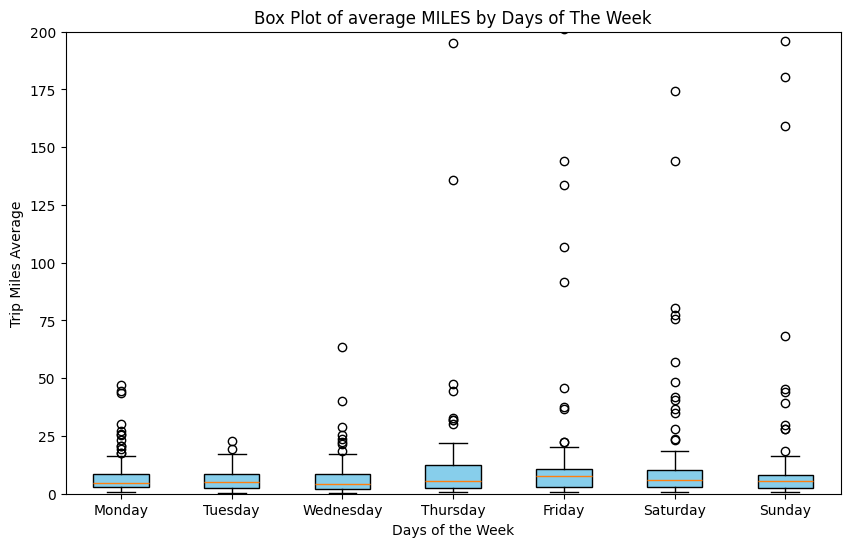

In [31]:
import matplotlib.pyplot as plt

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

uber_data['Day_Name'] = uber_data['Days'].apply(lambda x: days[x])

data_by_day = [uber_data[uber_data['Day_Name'] == day]['MILES'] for day in days]

plt.figure(figsize=(10, 6))
plt.boxplot(data_by_day, labels=days, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))

plt.title("Box Plot of average MILES by Days of The Week") 
plt.xlabel("Days of the Week")
plt.ylabel("Trip Miles Average")  
plt.ylim(0, 200)
plt.show()

Based on the results of this graph and in the context of our dataset. The median line, IQR and and whiskers of the boxplot for each day is roughly around the same range. In this context, that means that there isn't a single day of the week where there are a significantly different average trip miles from one another. You can also notice that later days in the week (Thursday - Sunday) have more significant outliers in trip miles, but do not change the overall pattern of the average.